In [32]:
import pandas as pd 
import numpy as np

import datetime
import os 

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
%matplotlib inline

from cycler import cycler

from pmmif import featherpmm


# Pandas Setup
pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
pd.set_option('display.float_format', lambda x: '{:,.2f}'.format(x))

# Colour Management
MC = '#242a49'  # Main
SC = '#ededed'  # Secondary
TC = 'red'  # Tertiary 

colors = ['#202540', '#17b5ff', 'red', 'pink', '#443857', '#bed6f7', '#144c4a']
cmap = mcolors.LinearSegmentedColormap.from_list('n', ['red', 'white', MC])
cmap2 = mcolors.LinearSegmentedColormap.from_list('n', ['white', MC])
boxplot_params = dict(
    patch_artist=True,
    boxprops=dict(facecolor=SC, color=MC),
    capprops=dict(color=MC, linewidth=2),
    whiskerprops=dict(color=MC),
    flierprops=dict(color=MC, markeredgecolor=MC),
    medianprops=dict(color='red', linewidth=2),
)

#Pyplot Setup
plt.rcParams.update({
    'font.family': 'monospace',
    'font.size': 10,
    'figure.figsize': (12, 6),
    'axes.titlesize': 16.0,
    'axes.facecolor': 'none',
    'axes.formatter.useoffset': False,  # Scientific notation
    'grid.color': SC,
    'figure.frameon': False,
})

In [7]:
def ensure_dir_exists(d):
    if not os.path.isdir(d):
        if os.path.exists(d):
            raise(f'Output directory {d} exists but is not a directory')
        else:
            os.mkdir(d)

ensure_dir_exists('graphs')

In [63]:
df_week = featherpmm.read_dataframe('ad_norm_hour_day_data/week.feather').df
df_week = df_week.set_index('date')

df_day = featherpmm.read_dataframe('ad_norm_hour_day_data/day.feather').df

df_actual_week = featherpmm.read_dataframe('ad_norm_hour_day_data/actual.feather').df
df_actual_week = df_actual_week.set_index('date');

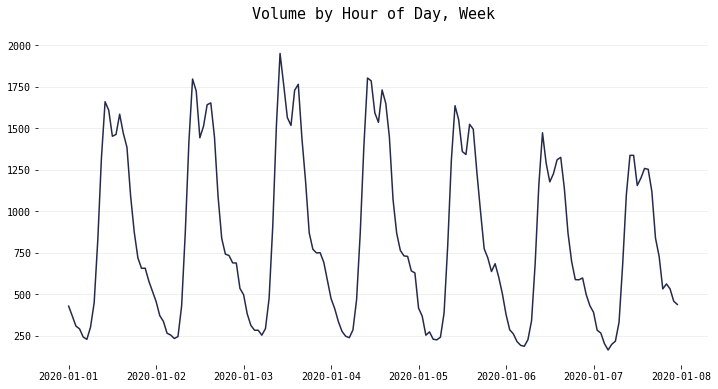

In [58]:
plt.figure()
plt.axes(frameon=False)
plt.title('Volume by Hour of Day, Week', pad=20, fontsize=15)
plt.plot(df_week, color=MC);
plt.grid(color=SC, axis='y')

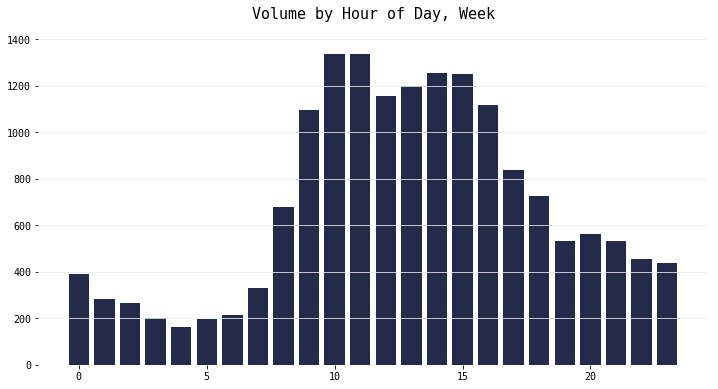

In [59]:
bounds = list(range(1, 24))
df_day['time_of_day_hour_bins'] = np.digitize(df_day.time, bounds)
counts = df_day.groupby('time_of_day_hour_bins')['time'].count()


plt.axes(frameon=False)
plt.title('Volume by Hour of Day, Week', pad=20, fontsize=15)
plt.bar(counts.index, counts.values, color=MC);
# counts.plot.bar()
plt.grid(color=SC, axis='y')

In [61]:
df_actual_week

,date,actual,expected
0,2020-01-01 00:00:00,463,427
1,2020-01-01 01:00:00,433,368
2,2020-01-01 02:00:00,183,307
3,2020-01-01 03:00:00,301,290
4,2020-01-01 04:00:00,254,241
...,...,...,...
163,2020-01-07 19:00:00,617,531
164,2020-01-07 20:00:00,589,561
165,2020-01-07 21:00:00,623,531
166,2020-01-07 22:00:00,630,457


In [ ]:
df

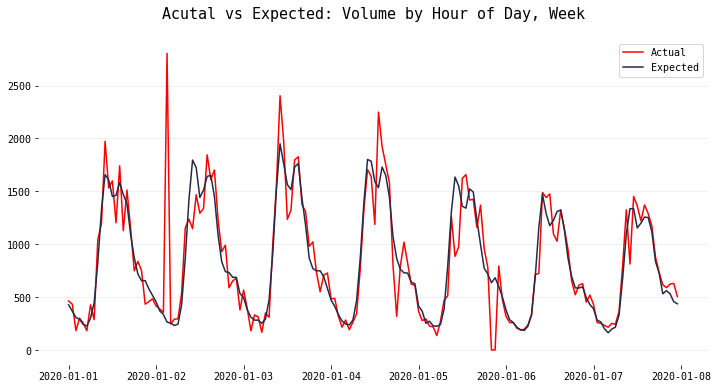

In [73]:
plt.figure()
plt.axes(frameon=False)
plt.title('Acutal vs Expected: Volume by Hour of Day, Week', pad=20, fontsize=15)
plt.plot(df_actual_week['actual'], color='red');
plt.plot(df_actual_week['expected'], color=MC)
plt.legend(['Actual', 'Expected'])
plt.grid(color=SC, axis='y')

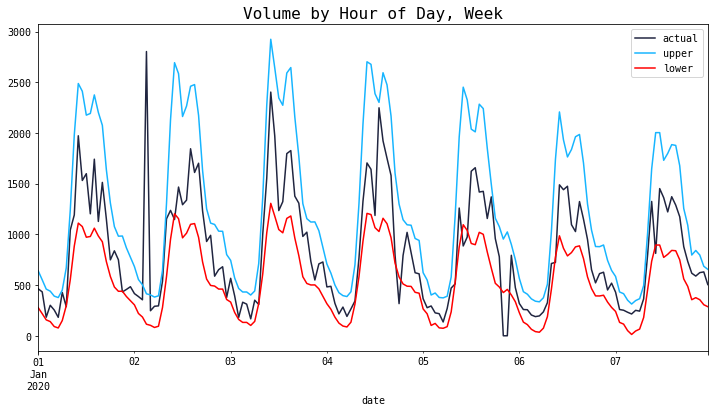

In [93]:
df_aw = df_actual_week.copy()

df_aw['upper'] = np.maximum(
    df_aw['expected'] * 1.5,
    df_aw['expected'] + 150,
)

df_aw['lower'] = np.minimum(
    df_aw['expected'] * 0.67,
    np.maximum(df_aw['expected'] - 150, 0)
)

del df_aw['expected']


df_aw.plot.line(title='Volume by Hour of Day, Week', color=colors);


In [92]:
# detecting anomalies
df_aw['actual_min_ok'] = df_aw['actual'] >= df_aw['lower']
df_aw['actual_max_ok'] = df_aw['actual'] <= df_aw['upper']
df_aw[~ (df_aw['actual_min_ok'] & df_aw['actual_max_ok'])]

,actual,upper,lower,actual_min_ok,actual_max_ok
date,,,,,
2020-01-01 07:00:00,287,670.50,297.00,False,True
2020-01-01 21:00:00,433,984.00,439.52,False,True
2020-01-02 03:00:00,2804,414.00,114.00,True,False
2020-01-02 10:00:00,1147,"2,694.00","1,203.32",False,True
2020-01-03 07:00:00,309,712.50,318.25,False,True
2020-01-04 18:00:00,317,"1,299.00",580.22,False,True
2020-01-05 08:00:00,512,"1,189.50",531.31,False,True
2020-01-05 10:00:00,886,"2,452.50","1,095.45",False,True
2020-01-05 11:00:00,974,"2,326.50","1,039.17",False,True
